# Beginner Series Tutorial 2: NumPy and Tabular Data

In this tutorial we will go over the fundamentals of dealing with tabular/array data using arguably the most popular Python libraries: `numpy` and `pandas`. By the end of this, you will hopefully be comfortable with:
1. Using `numpy` to _efficiently_ manipulate numeric data
2. Using the lightweight `numpy` wrapper `pandas` and its utility
3. `numpy` broadcasting and advanced operations

# Introduction

First, if running a Google Colab instance, you'll need to pull the data manually.

In [1]:
# !curl -o dataset_31_credit-g.csv https://raw.githubusercontent.com/x94carbone/AIML-tutorials/master/beginner/dataset_31_credit-g.csv
# !curl -o dsgdb9nsd_044615.xyz https://raw.githubusercontent.com/x94carbone/AIML-tutorials/master/beginner/dsgdb9nsd_044615.xyz

## What is `numpy`?

The library `numpy` (NumPy) stands for **num**erical **py**thon. You can find its excellent documentation [here](https://numpy.org/doc/stable/). It is a jack-of-all-trades, state-of-the-art, open-sourced library for handling any and all types of numerical data you can imagine. I will outline a few of its features as provided in the [first pages of its documentation](https://numpy.org/doc/stable/user/whatisnumpy.html).

1. NumPy facilitates the creation of fixed-size arrays of the _same datatype_.
2. NumPy has advanced mathematical operations built-in. These are implemented efficiently using compiled backends.
3. NumPy supports _vectorization_, allowing for fewer lines of code and faster execution.

It is also worth noting that NumPy is extremely well-tested, actively maintained, and serves as the foundation for almost _all_ numerical scientific code written in Python. If you are doing numerical science in Python, you're either using NumPy or using a library that uses NumPy.

## What is the point of this tutorial?

This tutorial serves as one of a few intended to get everyone interested in the AI/ML series on the same page. 
* If you're a beginner, we hope that you'll benefit from the overview of basic concepts, and the references to various documentation pages which can provide more detail where this tutorial is sparse.
* If you're not a beginner, we hope that this tutorial might help you use NumPy more efficiently, and possibly teach you something new!

Regardless, keep the following in mind:

> The bread and butter of PyTorch (the library we'll be using for machine learning applications) is the `Tensor` object. This object is built on top of NumPy arrays and follows the same syntax. **A solid, fundamental understand of NumPy is critical to understanding the machine learning code we will be discussing in future tutorials.**

The notebook is meant to be a standalone document. While we will present this live, everything you'll need should be self-contained in the notebook, so don't worry if you miss something.

## Why NumPy?

In the previous tutorial, we mentioned that [Python is a "slow" language](https://www.geeksforgeeks.org/what-makes-python-a-slow-language/). We won't go into a ton of details as to why, but we will mention that:
* Some Python operations are very fast, e.g. list comprehension
* Most Python operations are very slow, e.g. for loops
* NumPy operations are very fast, because they call pre-compiled executables written in lower-level languages

Essentially, NumPy unlocks `C`-level speed (not quite but close) but while using a much more human-readable language, which helps in debugging, clean code writing, distribution, etc.

## Structure of this tutorial

I will be providing a lot of examples, but we will likely have more time, so please feel free to "challenge" me with on-the-fly questions. E.g., "Matt, I want to do xyz with NumPy, but have previously only been using for loops, is it possible?"

## Importing/installing NumPy

NumPy is not a standard library (contained in the Python installation like e.g. `os`). It can be easily installed via `pip` by `pip install numpy`. It is already pre-installed on Google Colab, so all that needs to be done is the actual importing. We use `np` as shorthand for NumPy (this is essentially a ubiquitous convention).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The basics (`np.ndarray`)

The core of NumPy is the `ndarray` object (see [here](https://numpy.org/doc/stable/user/absolute_beginners.html#more-information-about-arrays)). This stands for "N-dimensional array" and is basically a container for numerical data. It's easiest to see this by example.

## Vectors

For instance, here is an `ndarray` object of one dimension (a vector):

In [9]:
v_list = [1, 2, 3]

In [10]:
v = np.array(v_list)
v  # Note that Jupyter Notebooks allow for "rendering" by simply typing the object at the end of the cell

array([1, 2, 3])

Possibly the most useful operation for debugging NumPy code is the `.shape` property. Often times, checking the "shape" of an `ndarray` is an easy, efficient and fast way of checking to make sure your arrays are doing what they're supposed to do. This will be especially important when considering broadcasting. For now, we have initialized an `ndarray` vector, so we expect our shape to have only one dimension:

In [4]:
v.shape

(3,)

Indeed, we see that the `v.shape` result is a tuple, noting that the only dimension has three entries. Accessing elements of vectors is straightforward:

In [7]:
v[1]

2

## 2d arrays

How about a 2-dimensional array? Note the 2d `np.ndarray` and `np.matrix` objects are very similar, but permit different operations. We won't get into this here, and for now we'll only deal with the `np.ndarray` objects.

In [5]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

As before let's check the shape:

In [6]:
X.shape

(2, 3)

We see that the first dimension in `X.shape`, following with standard matrix convention, is the number of rows and the second is the number of columns. Accessing the elements of 2d arrays is also straightforward, and follows conventional matrix indexing, with the caveat that like anything in Python, we zero-index.

In [9]:
X[0, 2]

3

Note that trying to access elements beyond the dimensions of the matrix will result in an `IndexError`:

In [10]:
X[3, 0]

IndexError: index 3 is out of bounds for axis 0 with size 2

## >2d arrays

Of course, numpy allows for arbitrarily large arrays. We won't deal with these very much here, but they are important for machine learning purposes. The indexing is the same as 2d arrays.

In [15]:
np.random.seed(1234)
T = np.random.random(size=(3, 4, 4))

In [17]:
T[2, 1, 3]

0.9093159589724725

# Operations

Of course, the `np.ndarray` object wouldn't be very useful without the huge number of operations defined on it. Here, we'll go through these operations, why they're useful and when to use them. In addition, we'll present a real-world example use case!

## Simple arithmetic operators

These include addition, subtraction, multiplication, division, squaring, and many others. Note that everything presented here **applies elementwise**. If you're not familiar with this concept, this following example will help demonstrate the meaning. Note as well that here in this section we will consider operations of arrays with floats and integers.

In [21]:
np.random.seed(1234)
X = np.random.randint(low=1, high=5, size=(3, 4))

In [22]:
X

array([[4, 4, 3, 2],
       [1, 1, 1, 2],
       [4, 2, 4, 2]])

In [23]:
X + 3

array([[7, 7, 6, 5],
       [4, 4, 4, 5],
       [7, 5, 7, 5]])

Note that we took the array `X` and added 3 to every element of the matrix. This is _elementwise addition_. Subtraction works the same way. Let's look at multiplication, division and squaring:

In [28]:
X * 3

array([[12., 12.,  9.,  6.],
       [ 3.,  3.,  3.,  6.],
       [12.,  6., 12.,  6.]])

In [29]:
X / 3

array([[1.33333333, 1.33333333, 1.        , 0.66666667],
       [0.33333333, 0.33333333, 0.33333333, 0.66666667],
       [1.33333333, 0.66666667, 1.33333333, 0.66666667]])

In [32]:
X**2

array([[16, 16,  9,  4],
       [ 1,  1,  1,  4],
       [16,  4, 16,  4]])

There are many other operators, too many to cover in this tutorial, but in an attempt to be as complete as possible, let's list a few more that will act elementwise on the array:

In [35]:
np.sin(X)  # Always radians, in case that wasn't clear

array([[-0.7568025 , -0.7568025 ,  0.14112001,  0.90929743],
       [ 0.84147098,  0.84147098,  0.84147098,  0.90929743],
       [-0.7568025 ,  0.90929743, -0.7568025 ,  0.90929743]])

In [36]:
np.arctan(X)

array([[1.32581766, 1.32581766, 1.24904577, 1.10714872],
       [0.78539816, 0.78539816, 0.78539816, 1.10714872],
       [1.32581766, 1.10714872, 1.32581766, 1.10714872]])

In [37]:
np.log10(X)

array([[0.60205999, 0.60205999, 0.47712125, 0.30103   ],
       [0.        , 0.        , 0.        , 0.30103   ],
       [0.60205999, 0.30103   , 0.60205999, 0.30103   ]])

Here's a tricky one. Boolean operations also act elementwise:

In [40]:
X == 1

array([[False, False, False, False],
       [ True,  True,  True, False],
       [False, False, False, False]])

## Slicing

While not a proper mathematical operation, it is still extremely important to consider slicing arrays. Consider the following example: you have an array of $N$ rows and $M$ columns. Say that this array represents $N$ spectra from an instrument, where each of the $M$ points per spectra represents a point on an energy grid. What if you want to access the $n$th spectrum?

In [49]:
N = 70
M = 120
np.random.seed(1234)
X = np.random.random(size=(N, M))**2  # Square it to make the "spectra" positive

We want to access the $n$th spectrum. Say $n=37$.

In [50]:
n = 37

In [51]:
spectrum_star = X[n, :]
print(spectrum_star.shape)

(120,)


Note that the `shape` of the spectrum of interest is of the expected size, $M.$ This is just one example of where the `shape` operation can be extremely useful for debugging. Note that it would be extremely easy to make the following error:

In [52]:
not_my_spectrum = X[:, n]

No error, because $37 < N$ and $37 < M$. But if we check the shape, we can see it's wrong:

In [53]:
print(not_my_spectrum.shape)

(70,)


We can visualize this spectrum using [Matplotlib](https://matplotlib.org/), the premier plotting tool in Python (although it's possible some would argue that [Seaborn](https://seaborn.pydata.org/) is just as good). A word of warning about Matplotlib: the documentation leaves much to be desired. It can take a while to really understand Matplotlib, and generally, looking at StackOverflow answers is more efficient than trying to read the docs when you have a problem.

Let's also define a dummy energy grid to plot our "spectrum" on. We'll use `np.linspace` for this. Feel free to print out the grid yourself to really see what `np.linspace` is doing.

In [54]:
grid = np.linspace(4300, 4500, M)

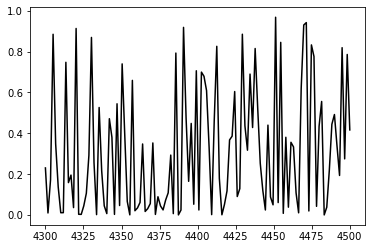

In [56]:
plt.plot(grid, spectrum_star, 'k-')
plt.show()

Slicing will work on arrays of any size/dimension, and it is efficient. For example, to get `spectrum_star`, you certainly would not want to do this:

In [57]:
badly_obtained_spectrum_star = []
for ii in range(M):
    badly_obtained_spectrum_star.append(X[n, ii])
badly_obtained_spectrum_star = np.array(badly_obtained_spectrum_star)
assert np.all(badly_obtained_spectrum_star == spectrum_star)

## Broadcasting

Previously when discussing elementwise operations, we were really discussing a general concept of [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). In the most general sense, broadcasting encompases the fundamental concept of how NumPy treats operations between arrays of different sizes. In the case of arrays and floats/integers, this is the specific case of some array of some shape, and an array of shape `(1,)`.

To demonstrate this, we'll use a curated version of the credit score data found [here](https://www.openml.org/d/31). The long story short is that this dataset ranks if you're a credit risk based on a variety of factors. Ignoring the possible ethical concerns with this type of data, let's focus only on the numerical columns of this dataset and show a common use of broadcasting.

To load in the data, I'll be using the commonly used `pandas` library.

In [61]:
# First, we read the csv data
df = pd.read_csv("dataset_31_credit-g.csv")

# Now we select only the numeric columns
df = df.select_dtypes(['number'])

Printing the dataframe below, we note one critical initial observation about our numerical data. The columns each represent a feature, and each row a data point (a person), but the features are all on different orders of magnitude. We don't want that for a variety of reasons, which we will go into in later tutorials. The long story short is that we want all of our features to be on the same scale, preferably -1 to 1 (roughly). So let's normalize each column by scaling it to a standard normal distribution.

In [65]:
df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


First, we can convert our dataframe to an `np.ndarray` by basically removing the `pandas` wrapper (this gets rid of the column and row labels).

In [68]:
data = df.to_numpy()
print(data.shape)

(1000, 7)


Now, we can normalize. To do so, we use the equation
$$ X_{ij}' = (X_{ij} - \mu_j) / (\sigma_j + \epsilon).$$
Here, $X_{ij}$ is the $i$th datapoint and the $j$th feature, and each feature has a mean and standard deviation. How can we compute those? Well, in NumPy it's easy! We can apply the same concept of array slicing in some of the standard NumPy functions:

In [71]:
mu = data.mean(axis=0, keepdims=True)
assert mu.shape == (1, 7)
sd = data.std(axis=0, keepdims=True)
assert sd.shape == (1, 7)

By looking at the shapes, we can see that each of the 7 features has its own mean and standard deviation, as expected. The `.mean()` and `.std()` methods took the mean and standard deviation along the specified axis! In this case, `axis=0` means to take the mean along the `0`th axis, which here means to take the mean over the rows for each column.

Now, here's where things get interesting. We want to execute the equation above. Here's one way you could do it:

In [79]:
def slow_normalize(data=data, mu=mu, sd=sd):
    data_prime_slow = np.empty(shape=data.shape)
    for ii, row in enumerate(data):  # Iterables iterate over rows by default in numpy
        for jj, value in enumerate(row):
            data_prime_slow[ii, jj] = (value - mu[0, jj]) / (sd[0, jj] + 1e-8)
    return data_prime_slow

data_prime_slow = slow_normalize()

However, this is extremely slow, sloppy and prone to errors. We want a more "numpythonic" way of doing this. This is where broadcasting comes in. We can perform precisely the above in a single line of code:

In [76]:
data_prime = (data - mu) / (sd + 1e-8)
assert np.all(data_prime == data_prime_slow)

As you can see, this produces the same result. Let's time it to see just how slow it actually is.

In [82]:
%timeit (data - mu) / (sd + 1e-8)

20.1 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [83]:
%timeit slow_normalize()

21.3 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Looks like the NumPy version is **1000 times faster**. And this is for only 1000 data points! What's going on here then? We can take a look at a simpler example to help drive home the point. Consider the simpler matrix and vector representing perhaps the data matrix and mean vector.

In [85]:
X = np.random.randint(low=1, high=5, size=(10, 3))
mu = X.mean(axis=0, keepdims=True)

In [86]:
X

array([[1, 1, 2],
       [1, 1, 2],
       [4, 2, 3],
       [1, 3, 1],
       [1, 1, 2],
       [4, 3, 2],
       [3, 2, 4],
       [1, 2, 1],
       [4, 4, 3],
       [3, 1, 1]])

In [87]:
mu

array([[2.3, 2. , 2.1]])

In [88]:
X - mu

array([[-1.3, -1. , -0.1],
       [-1.3, -1. , -0.1],
       [ 1.7,  0. ,  0.9],
       [-1.3,  1. , -1.1],
       [-1.3, -1. , -0.1],
       [ 1.7,  1. , -0.1],
       [ 0.7,  0. ,  1.9],
       [-1.3,  0. , -1.1],
       [ 1.7,  2. ,  0.9],
       [ 0.7, -1. , -1.1]])

From the above, note that `X - mu` performs the operation of subtracting `mu[0]` from the `0`th column in `X`, but for every row, and similarly for `mu[1]` and `mu[2]`. This process is much faster than using Python for loops because NumPy is calling **compiled libraries**, which use lower-level code like C++ or Assembly. You always want to use broadcasting and NumPy functions. They will always be faster and usually more efficient.

Broadcasting is simple but requires some intuition to use naturally. Here are a few tips that will help you effectively use this concept.
* Read the [docs](https://numpy.org/doc/stable/user/basics.broadcasting.html) in detail.
* Always check the `shape` of your result.
* Be very careful about sanity-checking your results! Sometimes broadcasting can do unexpected things. For example, do you know what happens if you do the following?

In [95]:
np.random.seed(1234)
X1 = np.random.randint(low=1, high=5, size=(3, 3))
v1 = np.random.randint(low=1, high=5, size=(3,))
what_is_this = X1 * v1

If not, be sure you're careful with your dimensions!

## Constructing arrays

Here's another example of the usage of broadcasting to drive home the point. Consider that you want to create an array of the 1d particle in a box wave functions. If you don't know what these are, don't worry, just look at the equation below,

$$ \psi_n(x) = \sqrt{\frac{2}{L}} \sin \frac{n \pi x}{L}$$

Lets take $L = 1$ as constant, and construct the array (matrix) where each row of the matrix represents a different $n = 1, 2, 3, ...$ and each column represents a different value for $x$ on a fixed grid.

Using NumPy, this is straightforward to do via **broadcasting**, which we'll discuss later in the context of mathematical operations.

In [20]:
L = 1.0
x_grid = np.linspace(0.0, L, 1000)
n_grid = np.array([nn for nn in range(1, 101)])

In [21]:
def psi(x, n, L=L):
    return np.sqrt(2.0 / L) * np.sin(n * np.pi * x / L)

First, we can do this the slow way:

In [24]:
psi_matrix_slow = []

# For every n
for nn in n_grid:
    
    # Use a temporary array
    tmp = []
    
    # Such that for every x
    for xx in x_grid:
        tmp.append(psi(xx, nn, L=L))
    psi_matrix_slow.append(tmp)

# Turn the resulting list of lists into an array
psi_matrix_slow = np.array(psi_matrix_slow)

Now, with broadcasting!

In [14]:
psi_matrix = psi(x_grid.reshape(1, -1), n_grid.reshape(-1, 1), L=L)

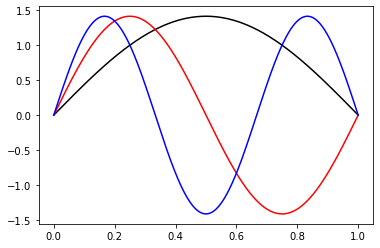

In [19]:
plt.plot(x_grid.squeeze(), psi_matrix[0, :], 'k')
plt.plot(x_grid.squeeze(), psi_matrix[1, :], 'r')
plt.plot(x_grid.squeeze(), psi_matrix[2, :], 'b')
plt.show()

## Advanced operations

Of course, we want to do more advanced things with NumPy, such as matrix multiplication, dot products, etc. Of course, there are NumPy functions for this! Let's take a look

### Matrix multiplication

In Python3, matrix multiplication can be performed using the `@` operator. It's extremely simple, see below. Note that the shapes of the matrices must be compatible.

In [113]:
np.random.seed(123)
X1 = np.random.randint(low=1, high=5, size=(20, 20))
X2 = np.random.randint(low=1, high=5, size=(20, 30))
result = X1 @ X2

As always, let's write a "dumb" function to test that this result produces what we want it to.

In [114]:
def slow_matmul(mat1, mat2):
    mat3 = np.empty(shape=(mat1.shape[0], mat2.shape[1]))
    for row in range(mat1.shape[0]):
        for col in range(mat2.shape[1]):
            mat3[row, col] = 0
            for xx, yy in zip(mat1[row, :], mat2[:, col]):
                mat3[row, col] += xx * yy
    return mat3

In [115]:
result_slow = slow_matmul(X1, X2)
assert np.all(result_slow == result)

In [116]:
%timeit X1 @ X2

8.28 µs ± 583 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [117]:
%timeit slow_matmul(X1, X2)

6.25 ms ± 356 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The matrix operation is about 1000 times faster, and that's only for extremely small matrices!

### Dot product

The dot product (at least the one we'll focus on) projects two vectors of the same size into the real numbers:

$$ \mathbf{v}_1 \cdot \mathbf{v}_2 = c \in \mathbb{R}. $$

The NumPy `dot` function however, does a _lot_ of things, one of which is this aforementioned operation. Let's start with that one:

In [84]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

In [86]:
assert np.dot(v1, v2) == 1 * 4 + 2 * 5 + 3 * 6

It's always useful to look at the documentation for various functions and methods. In NumPy, this is especially important since the inherent broadcasting potential can lead to unexpected results. Let's look at the documentation together.

In [90]:
# np.dot?

## Advanced broadcasting example

As a real life example, let's take an `xyz` file, which is a coordinate file for a molecule, and attempt to determine the atomic connectivity by bond distance. Don't worry too much about the following block of code. This is custom designed to read the format of interest. If you're interested, check out the file `dsgdb9nsd_044615.xyz`, which is one of about 130k molecules stored in the open-sourced [QM9 database](http://quantum-machine.org/datasets/). We've stored this locally for your convenience.

In [15]:
coordinates = []
elements = []
with open("dsgdb9nsd_044615.xyz", 'r') as file:
    n_atoms = int(file.readline())
    file.readline()  # skip a comment line
    for ii in range(n_atoms):
        line = file.readline().replace('.*^', 'e').replace('*^', 'e')
        line = line.split()
        coordinates.append(np.array(line[1:4], dtype=float))
        elements.append(line[0])
coordinates = np.array(coordinates)

We should sanity check `coordinates` to make sure things are sensible.
* The number of columns should be 3, one for each of the coordinates $x,$ $y,$ and $z.$
* There should be `n_atoms` rows. In this case, 16.

In [13]:
assert coordinates.shape == (n_atoms, 3)

We wish to determine which atoms are "bonded" to which other atoms. In chemistry, a bond is not a well-defined concept, but often times for simplicity, we take a simple cutoff (e.g. 2.5 Å). A more common way to determine whether or not two atoms are "bonded" is to see if the scaled sum of the atomic radii is less than the distance:

$$c(r_i + r_j) < d_{ij}$$

If this condition is satisfied, the atoms are considered bonded. Let's take $c=1.3$ and attempt to determine the connectivity.

In [14]:
ATOMIC_RADII = {'H': 0.23, 'C': 0.68, 'N': 0.68, 'O': 0.68, 'F': 0.64}
ELEMENT_INDEXES = {key: ii for ii, key in enumerate(ATOMIC_RADII.keys())}

The first step is to compute the distance matrix: I.e., the distance between every atom and every other atom:

$$ d_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2}.$$

It can help to actually write this out in for-loop notation first, but for this tutorial, the goal is to think about these operations in _terms_ of broadcasting. Consider the shapes of what's involved here. We have a `coordinates` array of shape `(16, 3)`. The final distance matrix should be of shape `(16, 16)`, because all 16 atoms must have a distance to all 16 other atoms (itself included).

There is no obvious way to broadcast shapes of `(16, 3)` together to produce a shape of `(16, 16)` aside from using matrix multiply, which is not what we want to do. The solution is to use `np.newaxis` to create a dummy dimension, allowing a new axis for broadcasting.

The following code takes the difference, for each coordinate, of each atom from every other.

In [50]:
diff = coordinates[:, np.newaxis, :] - coordinates[np.newaxis, :, :]
diff.shape

(16, 16, 3)

To get the actual $L_2$ norm, we need to take the sum of the squares over the last axis (the axis with shape 3), which corresponds to the coordinates:

In [51]:
dmat = np.sqrt(np.sum(np.abs(diff)**2, axis=-1))
dmat.shape

(16, 16)

This `dmat` matrix contains the $L_2$ distances between each atom and every other. Note that `scipy` actually has a function to do this, so we can check against that, and use that function for real research, as it is probably faster.

In [52]:
from scipy.spatial import distance_matrix

In [53]:
dmat_scipy = distance_matrix(coordinates, coordinates)

In [57]:
np.all(dmat_scipy == dmat)

True

Now that we have the distance matrix, we can actually figure out which atoms are bonded. In the case of a constant cutoff, this is quite simple. We can get the adjacency matrix in one line of code:

In [62]:
simple_adj_mat = (dmat < 2.5).astype(int)
simple_adj_mat

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]])

However, since whether or not two atoms are bonded depends on the atom type, our analysis is a bit more complex.

First, we get the atomic radii of all 16 atoms:

In [68]:
atomic_radii_array = np.atleast_2d(np.array([ATOMIC_RADII[elem] for elem in elements]))
assert atomic_radii_array.shape == (1, 16)

Next, we get the sum of the atomic radii for all pairs of elements in our molecule:

In [70]:
atomic_radii_matrix = atomic_radii_array.T + atomic_radii_array
assert atomic_radii_matrix.shape == (16, 16)

Finally, we can do an element-wise comparison to get the true connectivity matrix.

In [81]:
adj_mat = (dmat < (atomic_radii_matrix * 1.3)).astype(int)

In [82]:
adj_mat

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

# Summary

* NumPy is **the** numerical computing tool for Python. If you are a scientist doing any kind of numerical coding and you are _not_ using NumPy, please start now!
* NumPy is generally fast, and should be used instead of for loops in essentially every situation.
* There are two exceptions: 1) when it is not possible, in e.g. simulations where $x(t + 1) = f(x(t))$, and 2) when memory management becomes an issue.